In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns


df = pd.read_csv('tweets.csv', encoding= 'utf-8')

In [2]:
df.head(10)

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN
5,780893126605037568,realDonaldTrump,Join me for a 3pm rally - tomorrow at the Mid-...,False,NaN,2016-09-27T22:13:24,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,True,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN
6,780883582051123200,HillaryClinton,This election is too important to sit out. Go ...,False,NaN,2016-09-27T21:35:28,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN
7,780881075891531776,HillaryClinton,When Donald Trump goes low...register to vote:...,False,NaN,2016-09-27T21:25:31,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,{'media': [{'display_url': 'pic.twitter.com/DX...,{'media': [{'display_url': 'pic.twitter.com/DX...
8,780876760086880256,realDonaldTrump,"Once again, we will have a government of, by a...",False,NaN,2016-09-27T21:08:22,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,{'media': [{'display_url': 'pic.twitter.com/uY...,{'media': [{'display_url': 'pic.twitter.com/uY...
9,780874710049550336,HillaryClinton,3) Has Trump offered a single proposal to redu...,True,mcuban,2016-09-27T21:00:13,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [{'id_str': '16228398', 'nam...",NaN


In [27]:
df1 = df[['handle', 'text', 'is_retweet']]

In [28]:
df1.isnull().sum()

handle        0
text          0
is_retweet    0
dtype: int64

In [29]:
df2 = df1.loc[df1['is_retweet'] == False]

In [30]:
df2.shape

(5722, 3)

In [31]:
df2 = df2.copy().reset_index(drop=True)

In [32]:
df2.head()

,handle,text,is_retweet
0,HillaryClinton,The question in this election: Who can put the...,False
1,HillaryClinton,"If we stand together, there's nothing we can't...",False
2,HillaryClinton,Both candidates were asked about how they'd co...,False
3,realDonaldTrump,Join me for a 3pm rally - tomorrow at the Mid-...,False
4,HillaryClinton,This election is too important to sit out. Go ...,False


In [33]:
df2['is_trump'] = df2['handle'].apply(lambda x: 1 if x== 'realDonaldTrump' else 0) 

In [34]:
df2.head()

,handle,text,is_retweet,is_trump
0,HillaryClinton,The question in this election: Who can put the...,False,0
1,HillaryClinton,"If we stand together, there's nothing we can't...",False,0
2,HillaryClinton,Both candidates were asked about how they'd co...,False,0
3,realDonaldTrump,Join me for a 3pm rally - tomorrow at the Mid-...,False,1
4,HillaryClinton,This election is too important to sit out. Go ...,False,0


# PREPROCESSING

In [35]:
def remove_punctuation(text):
  lower = text.lower()
  exclude = set(string.punctuation)
  return "".join(ch for ch in lower if ch not in exclude)

In [36]:
df2['processed_text'] = df2['text'].apply(remove_punctuation)

In [37]:
df2.head()

,handle,text,is_retweet,is_trump,processed_text
0,HillaryClinton,The question in this election: Who can put the...,False,0,the question in this election who can put the ...
1,HillaryClinton,"If we stand together, there's nothing we can't...",False,0,if we stand together theres nothing we cant do...
2,HillaryClinton,Both candidates were asked about how they'd co...,False,0,both candidates were asked about how theyd con...
3,realDonaldTrump,Join me for a 3pm rally - tomorrow at the Mid-...,False,1,join me for a 3pm rally tomorrow at the midam...
4,HillaryClinton,This election is too important to sit out. Go ...,False,0,this election is too important to sit out go t...


In [38]:
def remove_stopwords(x):
    lower = x.lower()
    split = lower.split()
    final = ''
    for i in split:
        if i not in stopwords.words('english'):
            final += (i + " ")
    return final

In [39]:
df2['processed_text1'] = df2['processed_text'].apply(remove_stopwords)

In [40]:
df2.head(2)

,handle,text,is_retweet,is_trump,processed_text,processed_text1
0,HillaryClinton,The question in this election: Who can put the...,False,0,the question in this election who can put the ...,question election put plans action make life b...
1,HillaryClinton,"If we stand together, there's nothing we can't...",False,0,if we stand together theres nothing we cant do...,stand together theres nothing cant make sure y...


In [41]:
stemmer = PorterStemmer()

In [42]:
def split_and_stem(string):
    string = string.split(' ')
    temp = ""
    for i in string:
        temp += (stemmer.stem(i) + " ")
    return temp

In [43]:
df2['processed_text2'] = df2['processed_text1'].apply(split_and_stem)

# MODELING

In [44]:
x = df2['processed_text2']
y = df2['is_trump']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [46]:
cvec = CountVectorizer()

In [47]:
df_train  = pd.DataFrame(cvec.fit_transform(x_train).todense(),
             columns=cvec.get_feature_names())

In [48]:
df_train.head()

,007cigarjo,079,10,100,1000,10000,100000,1000000,100000000,1001,...,zandi,zero,zika,zip,zogbi,zone,zuckerman,zuluout,él,única
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_test = pd.DataFrame(cvec.transform(x_test).todense(),
             columns=cvec.get_feature_names())

In [50]:
df_test.head()

,007cigarjo,079,10,100,1000,10000,100000,1000000,100000000,1001,...,zandi,zero,zika,zip,zogbi,zone,zuckerman,zuluout,él,única
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
rfc = RandomForestClassifier()

In [60]:
rfc.fit(df_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [61]:
rfc.score(df_train, y_train)

0.99580517361920295

In [62]:
rfc.score(df_test, y_test)

0.87491264849755412

In [63]:
def run_model(x_train, y_train, x_test, y_test, rfc):
    rfc.fit(x_train, y_train)
    print "Base model score: " + str(np.mean(y_test))[:6]
    print "Training set score: ", str(rfc.score(x_train, y_train))[:6]
    print "Test set score: ", str(rfc.score(x_test, y_test))[:6]
    predictions = rfc.predict(x_test)
    print "\nConfusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, predictions), 
                                              columns=['predicted_0', 'predicted_1'], index=['is_0', 'is_1'])
    print "\nClassification Report:\n",classification_report(y_test, predictions)

In [64]:
run_model(df_train, y_train, df_test, y_test, rfc)

Base model score: 0.5087
Training set score:  0.9960
Test set score:  0.8700

Confusion Matrix:
      predicted_0  predicted_1
is_0          633           70
is_1          116          612

Classification Report:
             precision    recall  f1-score   support

          0       0.85      0.90      0.87       703
          1       0.90      0.84      0.87       728

avg / total       0.87      0.87      0.87      1431



In [65]:
rfc_y_score = rfc.predict_proba(df_test)[:,1]

In [66]:
print roc_auc_score(y_test, rfc_y_score)

0.937649477123


In [67]:
rfc_FPR = dict()
rfc_TPR = dict()
rfc_ROC_AUC = dict()

In [68]:
roc_curve(y_test, rfc_y_score)

(array([ 0.        ,  0.0056899 ,  0.02133713,  0.03698435,  0.056899  ,
         0.09957326,  0.15789474,  0.21052632,  0.34423898,  0.52204836,
         0.75817923,  1.        ]),
 array([ 0.        ,  0.39972527,  0.5989011 ,  0.69642857,  0.76510989,
         0.84065934,  0.88598901,  0.9271978 ,  0.95467033,  0.97802198,
         0.99450549,  1.        ]),
 array([ 2. ,  1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,  0.1,
         0. ]))

In [69]:
rfc_FPR[1], rfc_TPR[1], _ = roc_curve(y_test, rfc_y_score)
rfc_ROC_AUC[1] = auc(rfc_FPR[1], rfc_TPR[1])

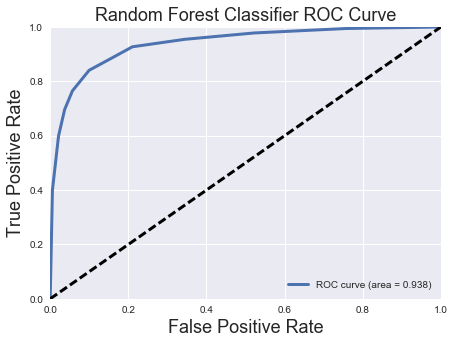

In [70]:
plt.figure(figsize=[7,5])
plt.plot(rfc_FPR[1], rfc_TPR[1], label='ROC curve (area = %0.3f)' % rfc_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Random Forest Classifier ROC Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [71]:
linearsvc = LinearSVC()
linearsvc.fit(df_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [72]:
linearsvc.score(df_train, y_train)
linearsvc.score(df_test, y_test)

0.89727463312368971

In [73]:
run_model(df_train, y_train, df_test, y_test, linearsvc)

Base model score: 0.5087
Training set score:  1.0
Test set score:  0.8972

Confusion Matrix:
      predicted_0  predicted_1
is_0          633           70
is_1           77          651

Classification Report:
             precision    recall  f1-score   support

          0       0.89      0.90      0.90       703
          1       0.90      0.89      0.90       728

avg / total       0.90      0.90      0.90      1431

